<h1><center>Laboratorio 10: Interpretabilidad 🤖</center></h1>

<center><strong>MDS7202: Laboratorio de Programación Científica para Ciencia de Datos</strong></center>

### Cuerpo Docente:

- Profesor: Pablo Badilla y Ignacio Meza D.
- Auxiliar: Sebastián Tinoco
- Ayudante: Felipe Arias y Diego Cortez

### Equipo: SUPER IMPORTANTE - notebooks sin nombre no serán revisados

- Nombre de alumno 1: Martín Sepúlveda
- Nombre de alumno 2: Maximiliano Varas


### **Link de repositorio de GitHub:** [Enlace](https://github.com/mvarasg/labs-sepulveda-varas)

### Indice 

1. [Temas a tratar](#Temas-a-tratar:)
3. [Descripcción del laboratorio](#Descripción-del-laboratorio.)
4. [Desarrollo](#Desarrollo)

## Temas a tratar

- Clasificación usando `XGBoost`.
- Métodos Agnósticos Globales de Interpretabilidad (`Partial Dependence Plot`, `Permutation Feature Importance`)
- Métodos Agnósticos Locales de Interpretabilidad (`Scoped Rules`, `SHAP`)

## Reglas:

- **Grupos de 2 personas**
- Asistencia **obligatoria** a instrucciones del lab (viernes 16.15). Luego, pueden quedarse trabajando en las salas o irse.
- **No se revisarán entregas de personas ausentes**. 
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Prohibidas las copias. 
- Pueden usar cualquer matrial del curso que estimen conveniente.

### Objetivos principales del laboratorio

- Generar un pipeline de clasificación con `XGBoost`.
- Implementar modelos de interpretabilidad para explicar el funcionamiento del modelo de clasificación.

El laboratorio deberá ser desarrollado sin el uso indiscriminado de iteradores nativos de python (aka "for", "while"). La idea es que aprendan a exprimir al máximo las funciones optimizadas que nos entrega `pandas`, las cuales vale mencionar, son bastante más eficientes que los iteradores nativos sobre DataFrames.

# 1. Problemas Clínicos del Dr. Simi

<p align="center">
  <img src="https://gantz.cl/wp-content/uploads/2020/01/79024136_2718114448239059_7240913062570491904_o.jpg" width="350">
</p>

El reconocido **Dr. Simi**, famoso vendedor de medicamentos en latinoamerica, debido a la creciente prevalencia de enfermedades crónicas, como la diabetes, decidió abrir una clínica especializada en el tratamiento de esta enfermedad en nuestro país.

La clínica del Doctor Simi se convirtió en un lugar donde los pacientes con diabetes podrían recibir atención médica integral. El personal médico estaba compuesto por especialistas en endocrinología, nutrición y enfermería, todos capacitados en el manejo de la diabetes.

Sin embargo él se ha dado cuenta que los tiempos han cambiado y gracias a las tecnologías es posible generar mejores predicciones en la diabetes conociendo el historial médico de las personas. Por esto, el doctor se ha colocado una meta de incluir modelos de machine learning dentro de sus clínicas, para ello le ha solicitado crear un modelo capaz de predecir/clasificar diabetes pero le rogó que el desarrollo del modelo tuviera un especial enfoque en la interpretabilidad de lo que hace su modelo.

Para que usted pueda entrenar el modelo, Dr. Simi le ha entregado un dataset de todos los clientes que fueron detectados con diabetes a lo largo de la historia de la clinica. Con ello, adjunta el historial médico de las personas en forma de datos tabulares para que usted pueda realizar fácilmente la clasificación.


In [1]:
import numpy as np
import pandas as pd


df = pd.read_csv('diabetes_data.csv')
df

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
0,4.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,0.0,1.0,0.0
1,12.0,1.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0
2,13.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,10.0,0.0,0.0,0.0,0.0
3,11.0,1.0,1.0,1.0,28.0,1.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,3.0,0.0,0.0,1.0,0.0
4,8.0,0.0,0.0,1.0,29.0,1.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70687,6.0,0.0,1.0,1.0,37.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,1.0
70688,10.0,1.0,1.0,1.0,29.0,1.0,1.0,0.0,1.0,1.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0,1.0
70689,13.0,0.0,1.0,1.0,25.0,0.0,1.0,0.0,1.0,0.0,0.0,5.0,15.0,0.0,1.0,0.0,1.0,1.0
70690,11.0,0.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0,1.0,1.0


## 2. Clasificación de pacientes con diabetes (0.5 pt)

<p align="center">
  <img src="https://media.tenor.com/QH--g3ZaSbsAAAAC/dr-simi-abrazo.gif" width="400">
</p>

En primer lugar, el reconocido doctor le pide entrenar un modelo de `XGBoost` utilizando como target la columna `Diabetes` del dataset `diabetes_data.csv`. Para el entrenamiento tome en cuenta **todos** los pasos necesarios para entrenar un modelo de aprendizaje supervisado vistos hasta la fecha (use `Pipeline`, `ColumnTransformer`, etc.), comente sus decisiones y los resultados obtenidos con el modelo. ¿Es acaso un buen predictor de diabetes?, ¿Qué buscan explicar las métricas utilizadas?, ¿las métricas utilizadas para medir la predictibilidad le permiten asegurar que su modelo una buena elección de las features?. 

In [2]:
#!pip install xgboost

Con el objetivo de facilitar el desarrollo posterior, se decide utilizar un df_ transformed transformado por un column transformer, para luego utilizarlo como entrada para XGBoost, esto se ejecutara sin pipeline, pues es necesario ejecutar por separado el proceso para que se tenga mejor calidad en gráficos y sea compatible con el las funciones usadas

In [3]:
# Inserte su código aquí
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
import xgboost

numeric_features = ['Age', 'BMI']
categorical_features = ['Sex', 'HighChol', 'CholCheck', 'Smoker', 'HeartDiseaseorAttack',
                        'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump',
                        'GenHlth', 'MentHlth','PhysHlth', 'DiffWalk', 'Stroke', 'HighBP', 'Diabetes']

xgb = xgboost.XGBClassifier()


numeric_transformer = StandardScaler()
categorical_transformer = 'passthrough'#OneHotEncoder(drop='first')

column_transformer = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

transformed_data = column_transformer.fit_transform(df)
df_tranformed = pd.DataFrame(transformed_data, columns = column_transformer.get_feature_names_out())


Resultados Clasificador:


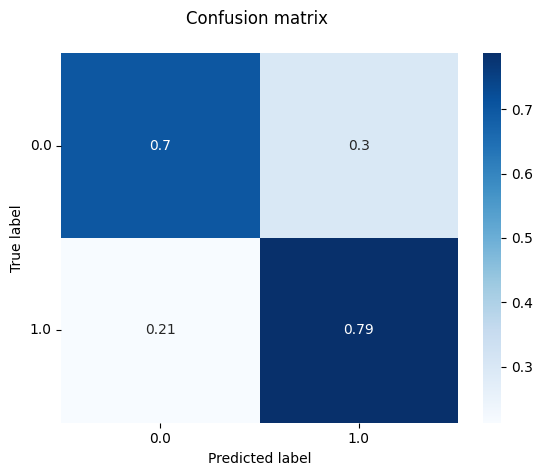

              precision    recall  f1-score   support

         0.0       0.76      0.70      0.73     10481
         1.0       0.73      0.79      0.76     10727

    accuracy                           0.74     21208
   macro avg       0.75      0.74      0.74     21208
weighted avg       0.75      0.74      0.74     21208



In [4]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, recall_score, precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.utils.multiclass import unique_labels


def pipline_classifer(clf, df):
    
    X_train, X_test, y_train, y_test = train_test_split(df.drop('cat__Diabetes', axis=1), df['cat__Diabetes'], test_size=0.3, random_state=0)
    
    transformed_data = clf.fit(X_train, y_train)

    predictions = transformed_data.predict(X_test)
            
    cm = confusion_matrix(y_test, predictions, normalize='true')
    classes = unique_labels(y_test, predictions)

    print(f'Resultados Clasificador:')
    df = pd.DataFrame(cm, index=classes, columns=classes)

    g = sns.heatmap(df, annot=True, cmap="Blues")
    g.set_yticklabels(g.get_yticklabels(), rotation=0)

    plt.title('Confusion matrix \n')
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.autoscale()
    plt.show()

    print(classification_report(y_test, predictions))

    return

pipline_classifer(xgb, df_tranformed)

## 3. Importancia de las features con XGBoost (0.5 pt)

<p align="center">
  <img src="https://media.tenor.com/5JAj5_IiagEAAAAd/dr-simi-dr-simi-dance.gif" width="400">
</p>

Para añadir el toque de interpretabilidad que Dr. Simi le pide, se le pide calcular la **importancia de las features** del modelo entrenado utilizando todos los métodos (*weight*, *cover*, *gain*) que posee xgboost usando `plot_importance`. ¿Los resultados obtenidos con los diferentes métodos son compatibles?, comente sus resultados y a que se debe la igualdad o desigualdad que ve en los resultados. Finalmente, ¿las importancias obtenidas son suficientes para obtener la interpretabilidad de un modelo que utiliza árboles? ¿Qué debilidad presenta este método?

In [5]:
feature_names = column_transformer.get_feature_names_out()

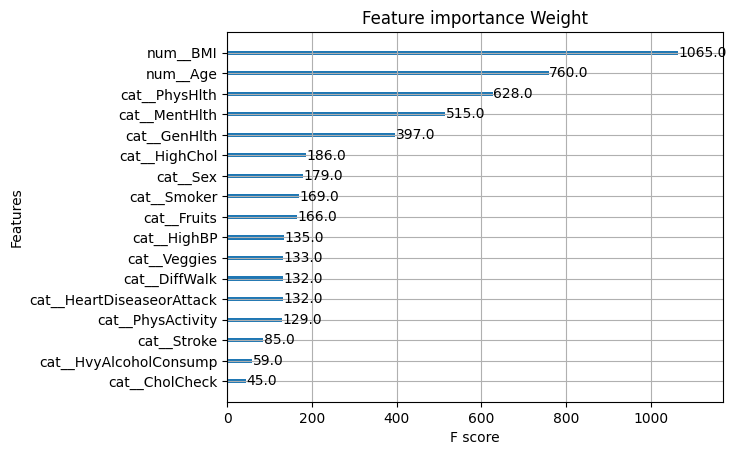

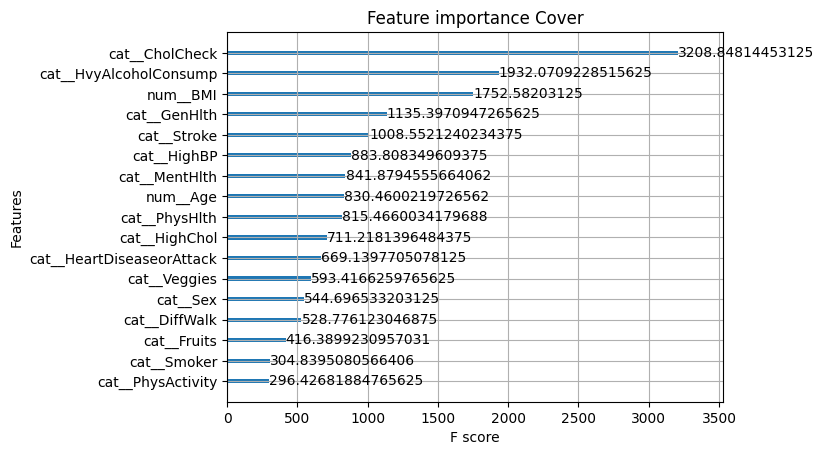

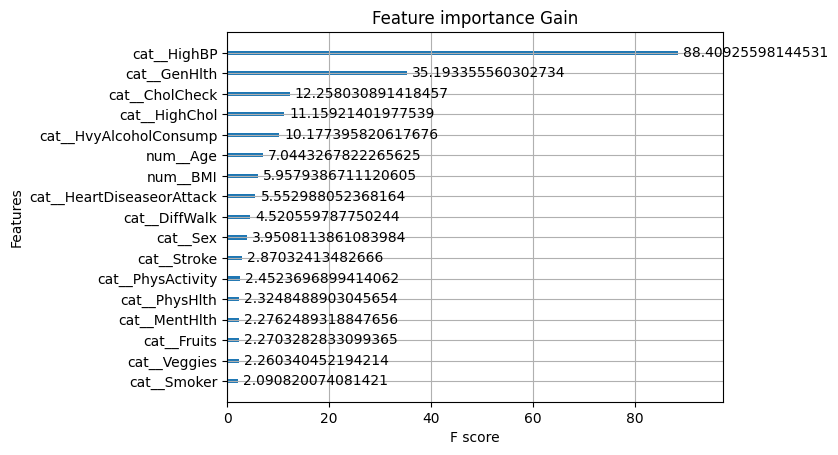

In [6]:

xgboost.plot_importance(xgb, max_num_features=20, importance_type="weight")
plt.title('Feature importance Weight')
plt.show()

xgboost.plot_importance(xgb, max_num_features=20, importance_type="cover")
plt.title('Feature importance Cover')
plt.show()

xgboost.plot_importance(xgb, max_num_features=20, importance_type="gain")
plt.title('Feature importance Gain')
plt.show()

En general, los metodos de obtencion de feature importance de xgboost no son comparables, ya que los 3 métodos representan cosas distintas, siendo weight asociado a la frecuencia de particiones en los árboles de xgboost, mientras que para coverage, representa la cantidad de veces que la feature fue utilizado para la toma de decisiones en las hojas del árbol, por último para Gain, se refiere a la mejora promedio en la función de pérdida al dividir un nodo de un árbol utilizando esa feature.




Al observar los resultados, podemos ver que existen features que se repiten en los 3 gráficos, por lo que es esperable que estas features tengan mayor implicancia en la decisión del modelo, siendo esta Age, BMI, High_BP, mental, physical y general Health. Estas son esperables ya que todas están asociadas al diagnóstico de la diabetes.



## 4. Métodos Agnósticos Globales (1 pt)

<p align="center">
  <img src="https://media.tenor.com/JcRHtjVuXN8AAAAC/dr-simi-farmacias-similares.gif" width="400">
</p>

Para mitigar los problemas encontrados en la sección anterior, Dr. Simi le pide implementar un **método de permutación** que le permita observar la importancia de las features. Visualice los resultados de este método en un gráfico. Para que su modelo sea consistente, repita el proceso **30 veces** y verifique la desviación estándar de sus resultados (¿Qué señala está?). Además, responda las siguientes preguntas:


- ¿Cómo mide la importancia de las features su propuesta?
- ¿Qué features tienen un mayor impacto en la salida del modelo?. Comente las 5 primeras, ¿Tienen sentido?
- ¿Cómo cambian sus conclusiones con respecto a las features importances del punto anterior?
- Nombre y explique 3 ventajas y 3 desventajas del método implementado.

In [7]:
from sklearn.inspection import permutation_importance

clf = xgb
X_train, X_test, y_train, y_test = train_test_split(df_tranformed.drop('cat__Diabetes', axis=1), df_tranformed['cat__Diabetes'], test_size=0.3, random_state=0)
result = permutation_importance(clf, X_test, y_test, n_repeats=30, random_state=0)



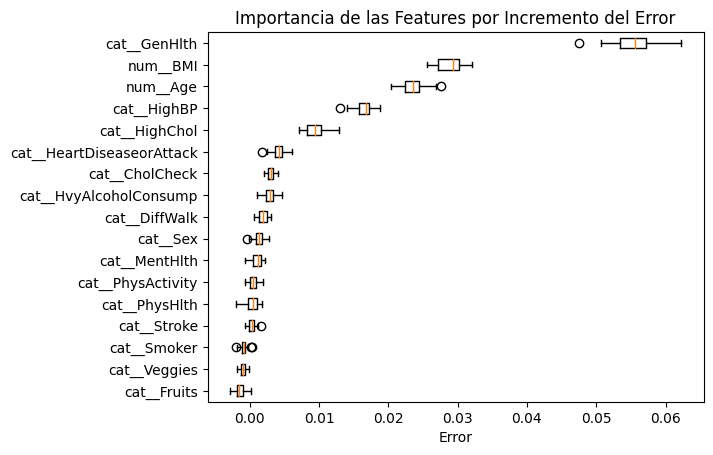

In [8]:
perm_sorted_idx = result.importances_mean.argsort()
plt.boxplot(
    result.importances[perm_sorted_idx].T,
    vert=False,
    labels=feature_names[perm_sorted_idx],
)
plt.title("Importancia de las Features por Incremento del Error")
plt.xlabel('Error')
plt.show()

La importancia de las features utilizando el método de permutación es medida a través del incremento del error de la predicción del modelo después de permutar los valores de las features, en este caso las 5 primeras features que mayormente impactan el error del modelo son, Genhealth, asociada a la salud general, seguida de BMI y AGE, correspondiente al índice de masa corporal y edad, posteriormente los indicadores de presión sanguínea alta y colesterol alto. Ya que estamos intentando predecir la existencia de la diabetes en una persona, gracias a los estudios médicos, se sabe que esta enfermedad está fuertemente relacionada al, espo la edad, el colesterol y la presión sanguínea, por lo cual es esperable que estas tengan mayor impacto en el modelo al estar tan relacionadas a la enfermedad, por último general health, abarca la salud general de una persona, y la enfermedad de la diabetes provoca una disminución en esta, por lo que esperable a su vez una fuerte implicaciones en el incremento del error de la predicción en el modelo. En general, las respuestas se asocian mucho a las ya vistas en el método anterior, sin embargo se ve que mental and physical health ya no se encuentran en el top de features, esto debido a que el cambio en otras variables es más significativo en el cambio de error, que es a lo cual se asocia este método.


Las ventajas asociadas a este método, es su fácil implementación, al ser una medida asociada al error de permutación de valores, así mismo, permite una fácil comprensión de interpretabilidad global, tal como se ve en este ejemplo al poder obtener conclusiones coherentes con el método, a su vez, toma en cuenta las interacciones de la feature con las demás, distinto al caso de los métodos anteriores, este si considera el efecto de otras variables dado el cambio de una feature en su implementación.


respecto a las desventajas, se tiene que este método necesita el acceso a las labels del modelo, por lo que no es posible obtener un resultados sin poseer un conjunto de datos con información real, algo que no es necesario par ala implementación de los modelos anteriores, así mismo el hecho de que considere el efecto de otras features, provoca que la existencia de correlaciones fuerte entre estas puede provocar salidas poco realistas que pueden afectar a los resultados del método, por último, agregar feature que poseen correlaciones, provoca que baje enormemente la importancia de las variable relacionadas, ya que su importancia en el modelo se comparte.




## 5. Métodos Agnósticos Locales (2 pt)

<p align="center">
  <img src="https://i.makeagif.com/media/1-27-2017/fBrzT8.mp4" width="400">
</p>

### Parte A (0.4 pt)

Alegre por saber cómo funciona el modelo de predicción a nivel general, Dr. Simi le pide ahora interpretar las predicciones de su modelo a nivel de paciente (es decir, desde un punto de vista **local**). Para esto, el ilustre farmacéutico le pide calcular los *shap values* de su modelo. ¿Qué representa cada número en su resultado? ¿Es posible atribuir un significado a la positividad/negatividad de cada valor?

In [9]:
#!pip install shap

In [10]:
import warnings
warnings.filterwarnings("ignore", message=".*The 'nopython' keyword.*")

In [75]:
# Inserte código para calcular shapley values aquí
import shap

explainer = shap.TreeExplainer(xgb)
shap_values = explainer(df_tranformed.drop('cat__Diabetes', axis=1))

shap_values

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


.values =
array([[-0.96962297, -0.38059366,  0.06015881, ..., -0.10756048,
        -0.00836018,  0.44059935],
       [ 0.2033546 , -0.1489902 ,  0.03950871, ..., -0.03663539,
         0.07367869,  0.3548022 ],
       [ 1.042566  , -0.29426685,  0.3730231 , ..., -0.05087871,
        -0.01627943, -0.48723418],
       ...,
       [-0.15589012, -0.37192625, -0.02614488, ...,  0.25349957,
        -0.02429732,  0.39964926],
       [ 0.28320482, -0.9450323 , -0.12259355, ...,  0.38919804,
        -0.01609597,  0.47137555],
       [ 0.11946068, -0.3517373 , -0.06894023, ..., -0.09023415,
        -0.03706506,  0.58344024]], dtype=float32)

.base_values =
array([-0.01940279, -0.01940279, -0.01940279, ..., -0.01940279,
       -0.01940279, -0.01940279], dtype=float32)

.data =
array([[-1.60723742, -0.54217564,  1.        , ...,  0.        ,
         0.        ,  1.        ],
       [ 1.19768093, -0.54217564,  1.        , ...,  0.        ,
         1.        ,  1.        ],
       [ 1.54829572, -0.

Los resultados del cálculo de shap values buscan una representación lineal del efecto de cada feature dado su valor, un ejemplo de esto es decir que dado un valor 0 asociado a no saber si una persona tiene o no diabetes, un alto índice de masa corporal, que está asociado a que exista diabetes, sumando de manera positiva a la probabilidad de que el paciente tenga diabetes, y un BMI bajo indicaría un valor negativo, es decir que a estos valores se les puede asociar positividad o negatividad dependiendo del efecto que tienen para clasificarlos como una clase u otra.

### Parte B (0.4 pt)

Usando los *shap values* calculados, grafique el **aporte** de las diferentes variables para las instancias **1**, **9** y **150**, interprete sus resultados y responda:
- ¿Qué variables afectan de manera positiva/negativa a la probabilidad de poseer diabetes? 
- ¿Existe algún patrón común entre las instancias analizadas? 
- ¿Es posible generalizar estas conclusiones a todo el dataset?

Shap values for 1st instance


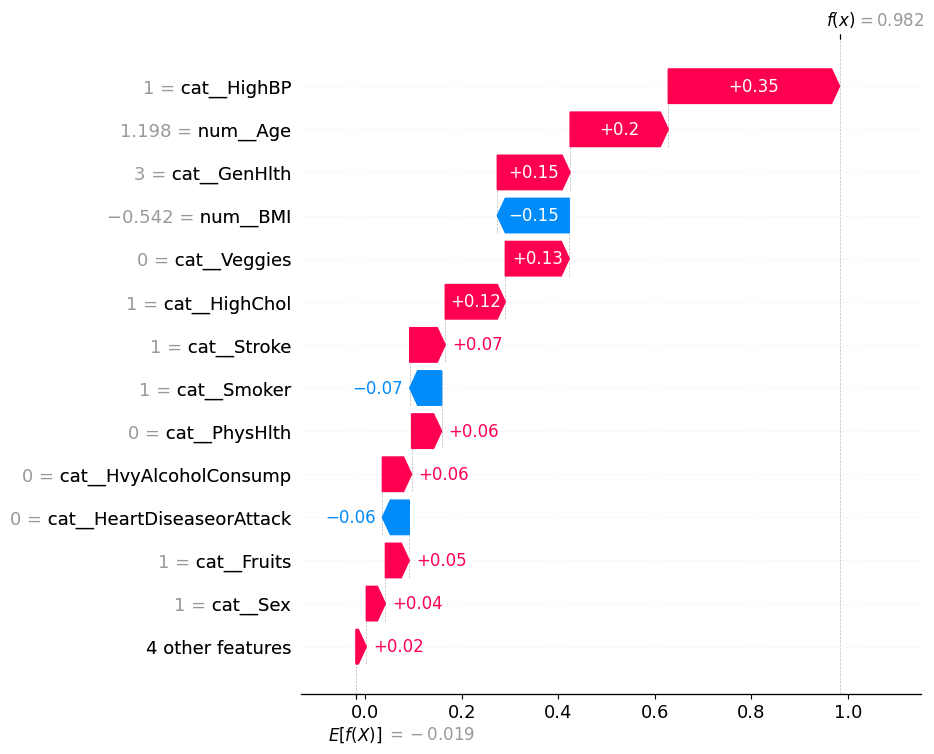

Shap values for 9th instance


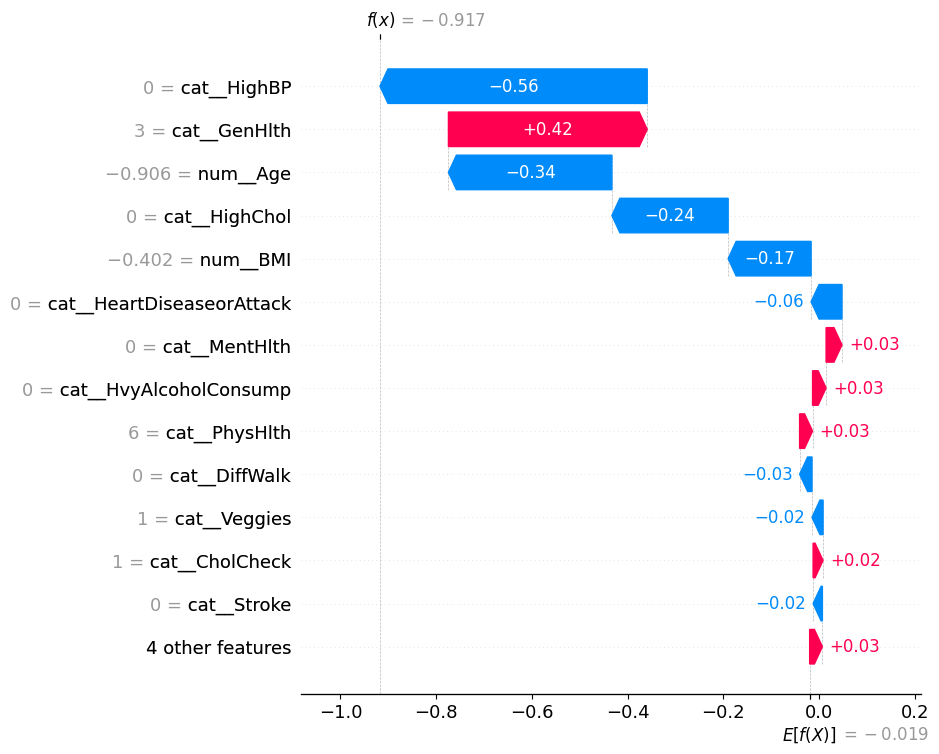

Shap values for 150th instance


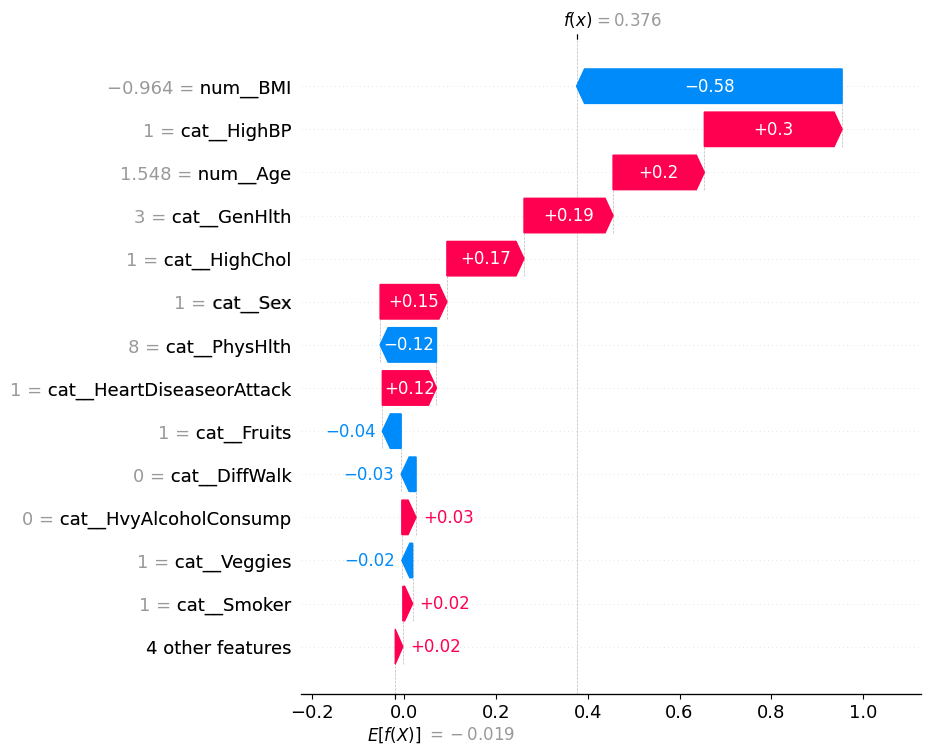

In [12]:
# Inserte código para generar gráficos de aporte local aquí
idx= 1

print('Shap values for 1st instance')
shap.plots.waterfall(shap_values[idx,:], 
                     max_display=14)

idx= 9

print(f'Shap values for {idx}th instance')
shap.plots.waterfall(shap_values[idx,:], 
                     max_display=14)

idx= 150

print(f'Shap values for {idx}th instance')
shap.plots.waterfall(shap_values[idx,:], 
                     max_display=14)

Dentro de los las features que se repiten de manera más recurrente en estas representaciones de la calificación de los pacientes, está el high_BP asociado a la presión sanguínea, donde para los 3 casos está en el top 3, se ve que posee un efecto negativo cuando no hay presión alta, por lo que se asocia a la no existencia de diabetes, mientras que cuando existe presión alta, esta si genera un valor positivo asociado a la existencia de la enfermedad. Esto se repite por la edad y BMI , donde mayor edad/BMI se asocia a mayor probabilidad de diabetes, y viceversa. así mismo pasa con las categóricas de HighChol y GenHlth, que poseen un comportamiento similar a highBP. Cabe destacar que estas features más comunes en la explicación también son las más comunes en los métodos Globales.

### Parte C (0.4 pt)

Genere ahora una visualización donde se grafique el aporte de cada feature a nivel **global** e interprete sus resultados. ¿Qué diferencias existen con las conclusiones generadas a nivel de instancia?

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


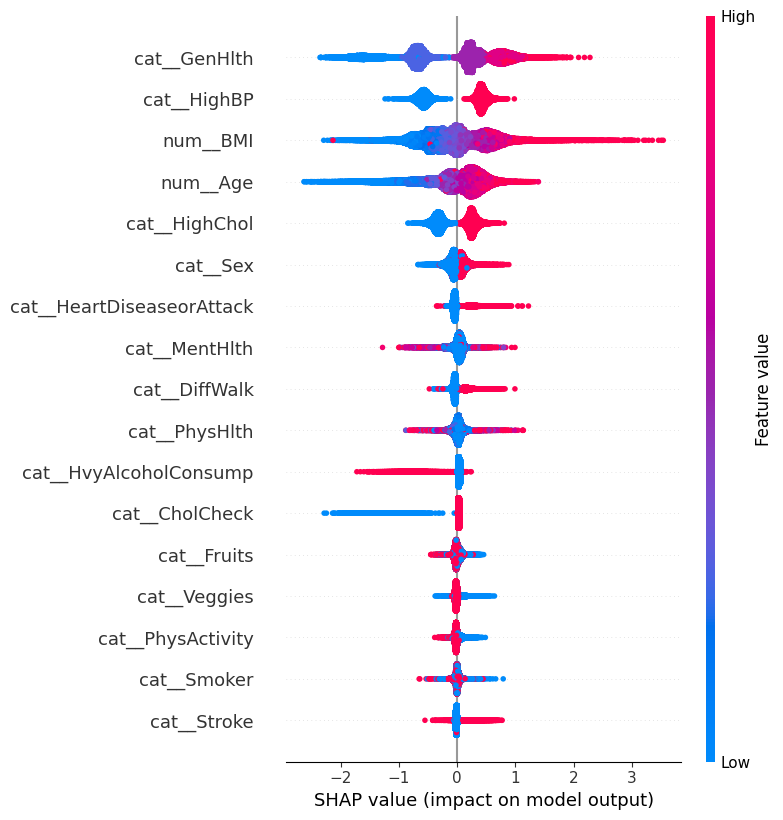

In [13]:
shap.summary_plot(shap_values, df_tranformed.drop('cat__Diabetes', axis=1))

Desde el gráfico, se puede ver los SHAP values ordenandos por feature importance global, estos se asemejan en gran medida a lo visto a nivel de instancia, donde los mayores valores asociados a la variabilidad en los SHAP valores están, en efecto centrados en las features con mayor feature importance, sin embargo a nivel de instancia no necesariamente estos están ordenados de la misma manera, es esperable encontrarlos en el top 10 de features con mayor SHAP value, lo que entrega consistencia al compararlos Global y localmente.

### Parte D (0.4 pt)

Grafique ahora un *scatterplot* entre los *shap values* y las primeras 5 features con mayor impacto global (un gráfico por cada feature), coloreando cada punto por la probabilidad de tener diabetes. ¿Qué puede concluir de sus resultados?

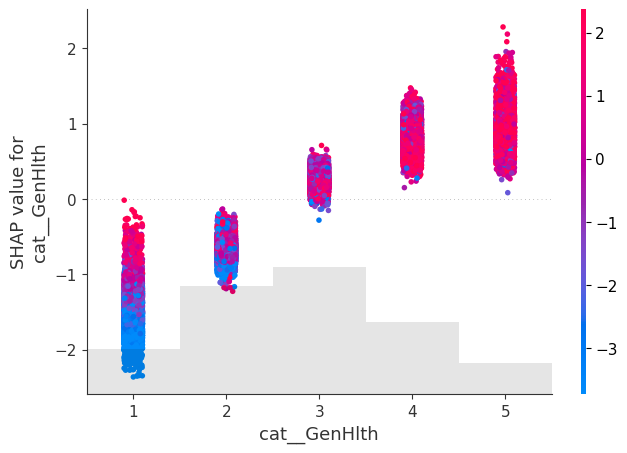

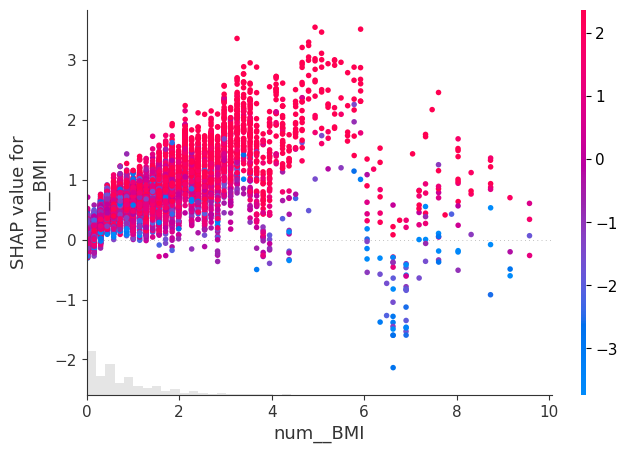

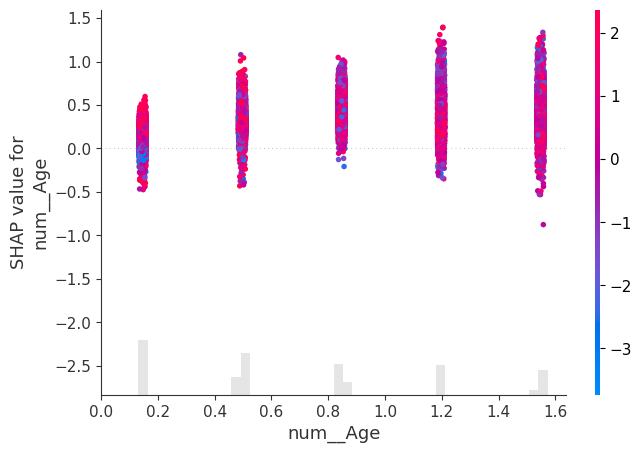

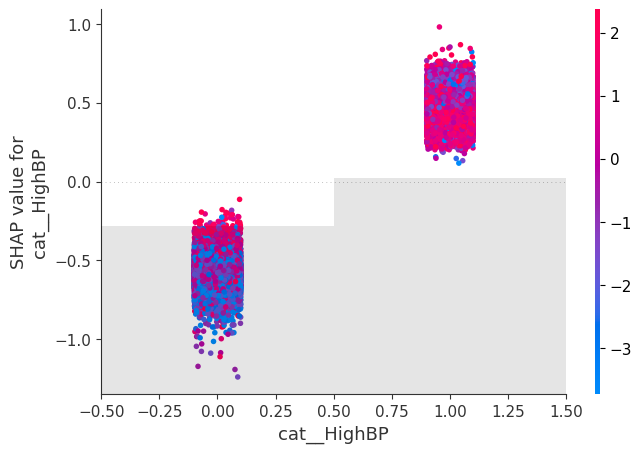

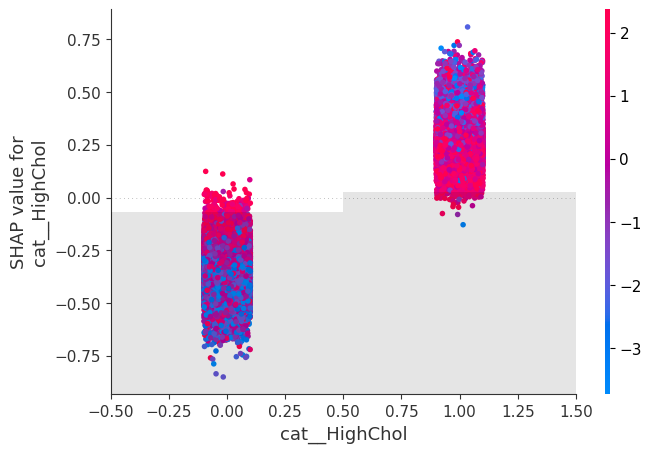

In [157]:
# Inserte código para generar gráficos de feature vs shap value aquí
for name in feature_names[perm_sorted_idx][::-1][:5]:
    #shap.dependence_plot(name, shap_values.values, X)
    shap.plots.scatter(shap_values[:,name],color = np.sum(shap_values.values, axis=1)+shap_values.base_values, xmin=0)    




De los resultados, se puede ver una clara estratificación de los grupos, siendo el color rojo asociado a tener diabetes, mientras que el color azul a no tenerlo. Así, para el caso de SHAP values positivos en el caso de BMI, la gran mayoría está centrada en el color rojo, lo cual se asocia a que efectivamente entregan mayores shap values para pacientes con alto BMI, así mismo se ve en general health. sin embargo, para otras features pasa que dada la interacción con features anteriores, no siempre surge esta estratificación, por ejemplo en HighChol, donde se ve que no existe la estratificación de rojo azul para Shap values positivos o negativos, sino que se ve que el valor absoluto de los SHAP values suele es más bajo para pacientes con diabetes y más alto cuando son pacientes sin diabetes.


### Parte E (0.4 pt)

Finalmente, se le pide generar un gráfico del tipo **Partial Dependence Plot** para las mismas 5 variables con mayor impacto global usando una submuestra de **1000 observaciones**. ¿Qué relación existe entre la salida promedio del modelo y cada feature analizada? ¿Son estas conclusiones generalizables para todo el conjunto de datos?

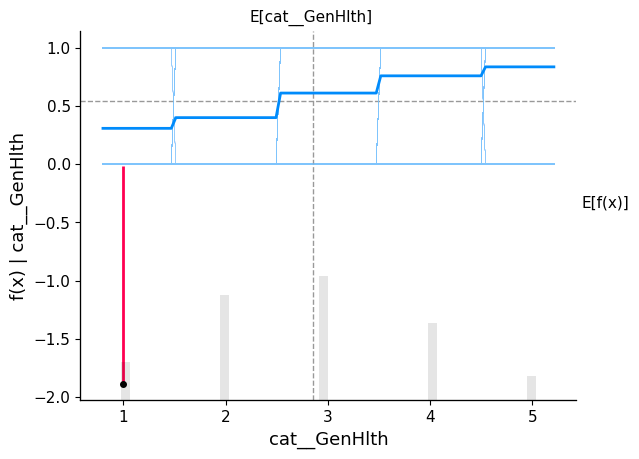

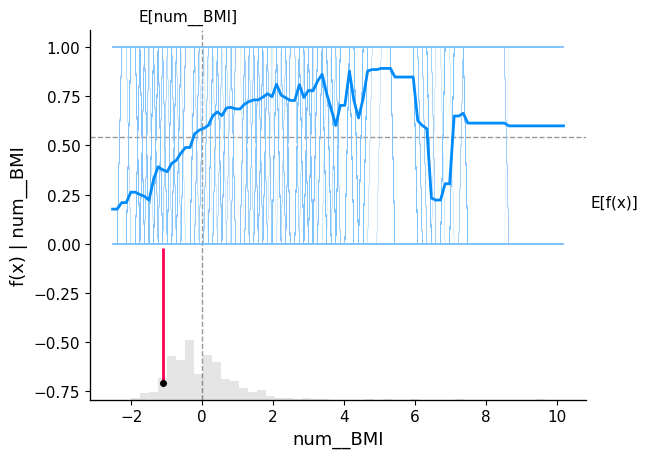

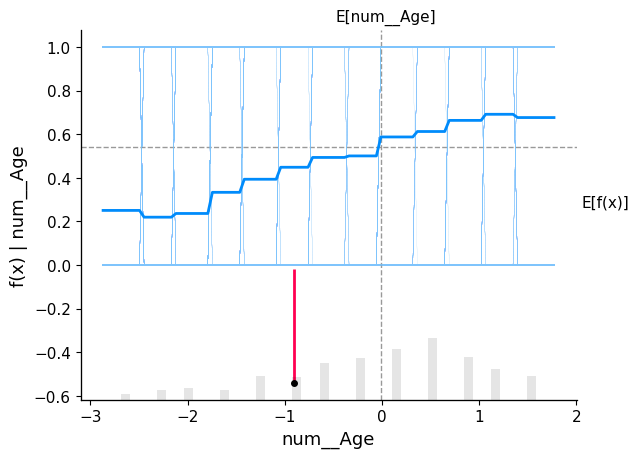

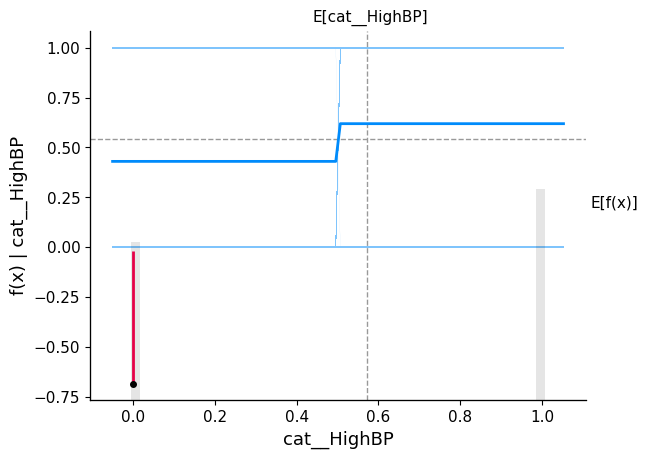

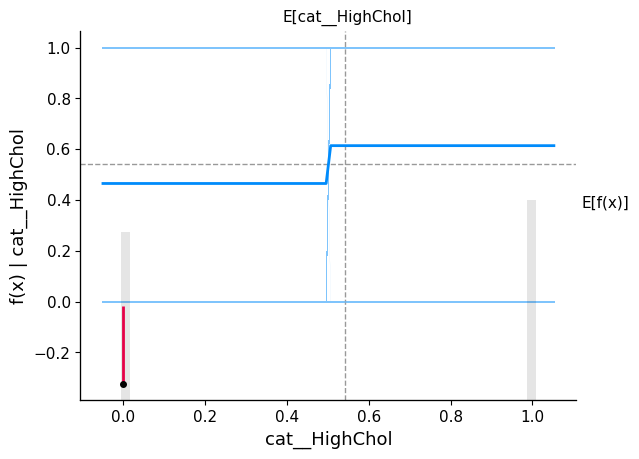

In [15]:
# Inserte código para generar gráficos PDP aquí
X1000 = shap.utils.sample(df_tranformed.drop('cat__Diabetes', axis=1), 1000)

sample_ind = 20
for name in feature_names[perm_sorted_idx][::-1][:5]:
    shap.partial_dependence_plot(
        name, xgb.predict, X1000, model_expected_value=True,
        feature_expected_value=True, ice=True,
        shap_values=shap_values[sample_ind:sample_ind+1,:]
    )



En general, se puede ver que para las 5 features, se sigue manteniendo respuestas consistentes con los análisis previos, donde las salidas del modelo si tienen una dependencia de las features, esto se ve claro en los aumentos de general Health o en los cambios en BMI, también en variables binarias como HighChol, aunque en mayor medida aún así se ve el efecto. Gracias a todos los análisis previos,es posible generalizar los resultados para el dataset, ya que son consistentes y la interpretación de estas coincide con la interpretación de otros métodos globales y los métodos locales.


## 6. Sistema de Reglas! (1 pt)

<p align="center">
  <img src="https://media.baamboozle.com/uploads/images/125978/1638281150_1380186_gif-url.gif" width="400">
</p>

Después de todo el trabajo hecho, Dr. Simi le pide simplificar el funcionamiento de su modelo en un sistema de reglas que le permita explicar a sus clientes las predicciones que genera su modelo. En particular, Dr. Simi le pide explicar la decisión tomada para las observaciones **1000**, **3001** y **5751**. Con las reglas propuestas señale a **cuánta población** es posible explicar con estas reglas e indique la **precisión** que poseen las reglas en la totalidad de los datos. ¿Tienen sentido sus reglas propuestas para las observaciones?. Fundamente sus respuesta señalando el impacto que tienen sus reglas sobre todo el conjunto de datos.

In [16]:
#!pip install alibi

In [165]:
from alibi.explainers import AnchorTabular

X = df_tranformed.drop('cat__Diabetes', axis=1)
predict_fn = lambda X: clf.predict(X)
explainer = AnchorTabular(predict_fn, clf.feature_names_in_, seed=1)
explainer.fit(X_train.to_numpy())

AnchorTabular(meta={
  'name': 'AnchorTabular',
  'type': ['blackbox'],
  'explanations': ['local'],
  'params': {'seed': 1, 'disc_perc': (25, 50, 75)},
  'version': '0.9.3'}
)

In [166]:
# Inserte su código para generar sistema de reglas aquí
class_names = ["Paciente_no_Diabetico", "Paciente_Diabetico"]

idx = 1000
# explicar predicción idx 1000
explanation = explainer.explain(X_test.to_numpy()[idx], threshold=0.95)
print(f'Paciente: {idx}')
print('Prediction: ', class_names[explainer.predictor(X_test.to_numpy()[idx].reshape(1, -1))[0]])
print('Anchor: %s' % (' AND '.join(explanation.anchor)))
print('Precision: %.2f' % explanation.precision)
print('Coverage: %.2f' % explanation.coverage)
print('')
idx = 3001
# explicar predicción idx 3001
explanation = explainer.explain(X_test.to_numpy()[idx], threshold=0.95)
print(f'Paciente: {idx}')
print('Prediction: ', class_names[explainer.predictor(X_test.to_numpy()[idx].reshape(1, -1))[0]])
print('Anchor: %s' % (' AND '.join(explanation.anchor)))
print('Precision: %.2f' % explanation.precision)
print('Coverage: %.2f' % explanation.coverage)
print('')
idx = 5751
# explicar predicción idx 5751
explanation = explainer.explain(X_test.to_numpy()[idx], threshold=0.95)
print(f'Paciente: {idx}')
print('Prediction: ', class_names[explainer.predictor(X_test.to_numpy()[idx].reshape(1, -1))[0]])
print('Anchor: %s' % (' AND '.join(explanation.anchor)))
print('Precision: %.2f' % explanation.precision)
print('Coverage: %.2f' % explanation.coverage)

Paciente: 1000
Prediction:  Paciente_no_Diabetico
Anchor: num__BMI <= -0.68 AND cat__GenHlth <= 2.00 AND cat__HighBP <= 0.00
Precision: 1.00
Coverage: 0.11

Paciente: 3001
Prediction:  Paciente_Diabetico
Anchor: num__BMI > 0.44 AND cat__DiffWalk > 0.00 AND cat__HighBP > 0.00
Precision: 0.98
Coverage: 0.08

Paciente: 5751
Prediction:  Paciente_Diabetico
Anchor: cat__GenHlth > 3.00 AND cat__HighBP > 0.00 AND num__BMI > -0.12
Precision: 0.98
Coverage: 0.12


Para los pacientes solicitados, es posible obtener el anchor respectivo por el sistema de reglas, donde se ve que para todas estas, la presión es bastante alta, siempre mayor al 0.98, lo cual quiere decir que las reglas generadas son bastante exactas, sin embargo, el Coverage no supera el 0.12, lo que quiere decir que no logra considerar una gran proporción de los puntos con estas anchor. En general se obtienen varias anchor que pueden generar un mayor coverage manteniendo una buena precisión.


Las reglas que genera el modelo si poseen sentido, ya que las reglas que usa por la comparación son, efectivamente, las top 5 features a nivel global, y a sí mismo las que poseen mayor efecto a nivel local.


# Retrospectiva... (1 pt)

En base a los diferentes métodos que implementa y ha comentado en este laboratorio, comente qué métodos le permiten entregar mejores conclusiones para la tarea de clasificación de diabetes. Por otro lado, ¿qué métodos son más útiles para el problema del doctor Simi, métodos agnosticos locales o globales?

Enmarcado en la tarea de clasificación de diabetes, los métodos que entregaron resultados mayormente interpretables fueron los relacionados a SHAP values, donde con estos fue posible utilizar métodos locales y globales y ejecutar una explicación complementaria a través de ambas, siendo que a través de los SHAP values fue posible caracterizar la decisión del clasificador a través de la interpretación lineal de suma y resta de cada una de las features, identificando cuáles eran las más recurrentes y de mayor valor, posteriormente usando las PDP, fue posible observar las relación directa de estas features con el clasificador, con esto fue posible hacer una relación entre los medios locales y globales y darle sentido e interpretación a los resultados.


Pensado en el objetivo principal de una farmacéutica a nivel de clientes, donde el cliente quiere entregar atención médica integral a cada cliente, por lo que metodos locales son más efectivos para esto, ya que se desea obtener una explicación integral por paciente más que un análisis global del fenómeno, por ejemplo, un análisis local con shape values puede identificar que el clasificador le dio un gran valor al índice de masa corporal en la clasificación por lo que esto permitirá interpretar que es necesaria la intervención de un nutricionista con el paciente, algo no lograble a nivel global, ya que a nivel global la importancia de las features no necesariamente reflejan cómo estas afectaron a la clasificación individual de cada paciente y pueda llevar a que no se considere el experto en salud adecuado para mejorar la salud del paciente.


# Conclusión
Eso ha sido todo para el lab de hoy, recuerden que el laboratorio tiene un plazo de entrega de una semana. Cualquier duda del laboratorio, no duden en contactarnos por mail o U-cursos.

![Gracias Totales!](https://media.tenor.com/ctnq4bhZE3gAAAAC/drsimi-simi.gif)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=87110296-876e-426f-b91d-aaf681223468' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>